In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import umap
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/apple-quality/apple_quality.csv


In [2]:
def plot_umap (embeds, y) :
    plt.figure(figsize=(8, 6))
    plt.scatter(embeds[:, 0], embeds[:, 1], c=y, cmap='viridis', s=10)
    plt.title('UMAP Visualization')
    plt.colorbar()
    plt.show()
    
def standardize (X) :
    means = X.mean(1)
    std = X.std(1)
    return X - np.expand_dims(means,1) / np.expand_dims(std,1) 

In [3]:
data = pd.read_csv('/kaggle/input/apple-quality/apple_quality.csv')
X = np.array([data[c].fillna(0) for c in data.columns if c != 'A_id' and c != 'Quality'])
X = standardize(X[: , :3999].astype(float))
y = np.array([1 if c == 'good' else 0 for c in data['Quality']])
y = y[:3999]

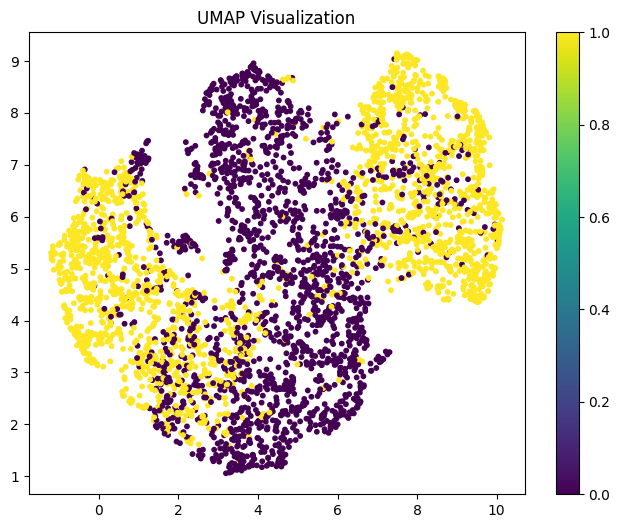

In [4]:
embeddings = umap.UMAP().fit_transform(X.T)

plot_umap(embeddings, y)